# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter, MultipleLocator

# Reading CSV file using Pandas

In [2]:
df = pd.read_csv(r"loan.csv") 
df.shape

/var/folders/n3/cbql2_sd28n7ws76wtd_mphw0000gn/T/ipykernel_50793/2743126099.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"loan.csv")


(39717, 111)

# Data Understanding

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [6]:
df1 = df[df['loan_status'] == 'Charged Off']
df1.shape[0]

5627

In [7]:
df1['home_ownership'].value_counts()

home_ownership
RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: count, dtype: int64

In [8]:
loan_status = df.loan_status.value_counts()
loan_status

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [9]:
32950 + 5627 + 1140

39717

In [10]:
#Fully Paid Percentage
round((32950/39717)*100, 2)

82.96

In [11]:
#Charged Off Percentage
round((5627/39717)*100, 2)

14.17

In [12]:
#Current Percentage
round((1140/39717)*100, 2)

2.87

# Data Cleaning

In [13]:
dict_1 = df.isnull().sum().to_dict()
col = []
for key, value in dict_1.items():
    if value == 0 :
        col.append(key)
print(col)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [14]:
clean_df = df[col]
print(clean_df.shape)

(39717, 43)


# 1. Loan Status Univariate analysis

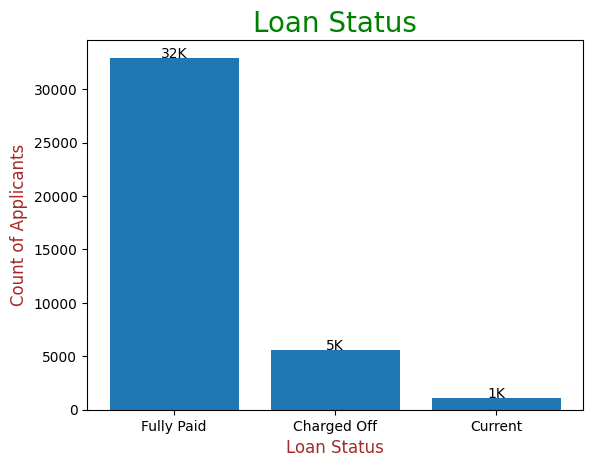

In [15]:
category = np.array(['Fully Paid','Charged Off', 'Current'])
loan_status = clean_df.loan_status.value_counts().values

plt.bar(['Fully Paid','Charged Off', 'Current'], df.loan_status.value_counts().values)
plt.title("Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Applicants", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

for xy in zip(category, loan_status):
    plt.annotate(text="{}K".format(xy[1] // 1000),  
                 xy=xy,
                 textcoords='data',
                 ha='center') 

plt.show()


# 2. Univariante analysis of Year - Loan issued by Year 

In [16]:
df2 = clean_df['issue_d'].apply(lambda x: int(x.split('-')[1]))
df2.value_counts()


issue_d
11    21656
10    11532
9      4716
8      1562
7       251
Name: count, dtype: int64

In [17]:
df2.value_counts(normalize=True) * 100    #39717

issue_d
11    54.525770
10    29.035426
9     11.874009
8      3.932825
7      0.631971
Name: proportion, dtype: float64

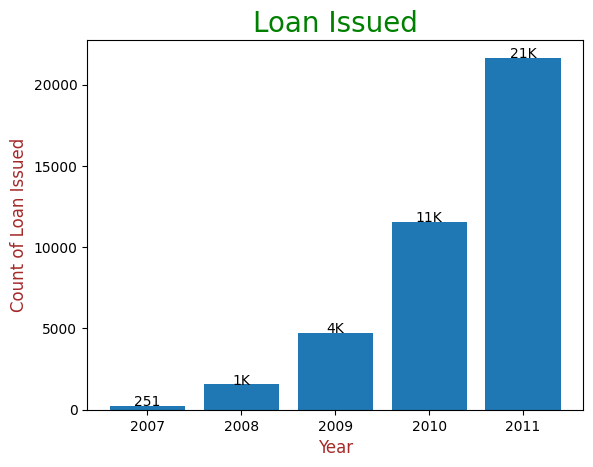

In [18]:
year = np.array(['2007','2008','2009','2010','2011'])
#loan_issued = df2.value_counts().values
loan_issued = np.array([251, 1562, 4716, 11532, 21656])

plt.bar(['2007','2008','2009','2010','2011'], loan_issued)
plt.title("Loan Issued", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Loan Issued", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

for xy in zip(year, loan_issued):
    plt.annotate("{}K".format(xy[1]//1000) if xy[1]>=1000 else xy[1],
                 xy=xy,
                 textcoords='data',
                 ha='center') 

plt.show()

# 3. Univariante Analysis - Grade wise

In [19]:
clean_df['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

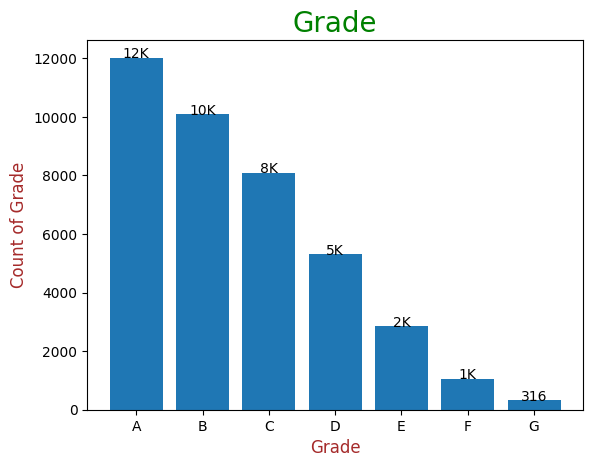

In [20]:
grades = np.array(['A','B', 'C','D','E','F','G'])
count_grade = clean_df.grade.value_counts().values

plt.bar(['A','B', 'C','D','E','F','G'], clean_df.grade.value_counts().values)
plt.title("Grade", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Grade", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

for xy in zip(grades, count_grade):
    plt.annotate("{}K".format(xy[1]//1000) if xy[1]>=1000 else xy[1],  
                 xy=xy,
                 textcoords='data',
                 ha='center') 

plt.show()

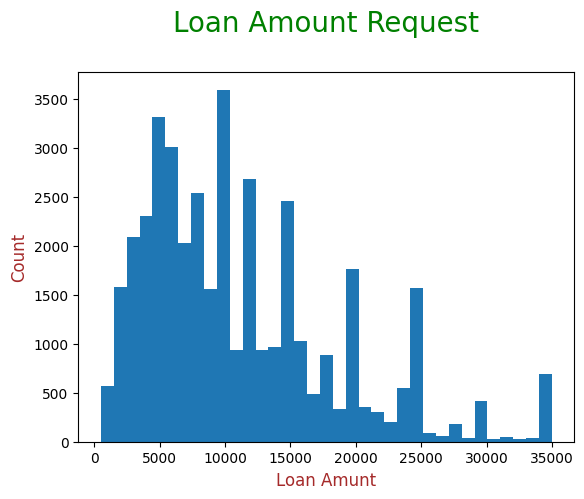

In [21]:
plt.hist(clean_df['loan_amnt'],bins=35)
# Adding and formatting title
plt.title("Loan Amount Request\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Amunt", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

# 4. Univariante Analysis - Purpose of loan taken

In [22]:
clean_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [23]:
clean_df['purpose'].value_counts()
#df.value_counts().sort_values(by='purpose', ascending=False)

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

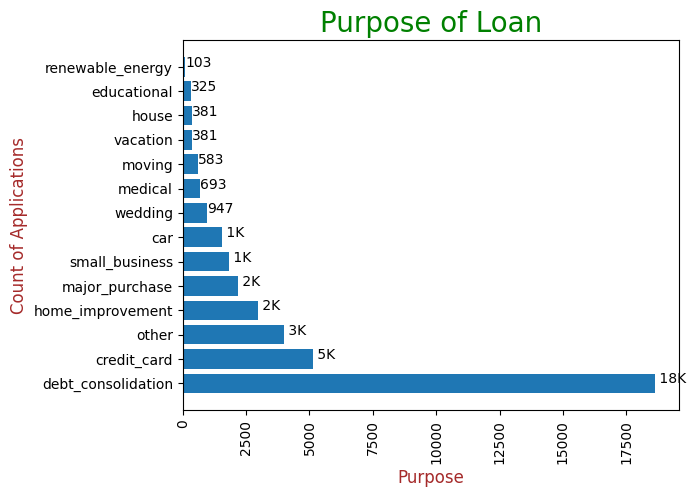

In [24]:
#purpose = df['purpose'].unique()
purpose = np.array(['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business','car','wedding', 'medical', 'moving','vacation','house','educational','renewable_energy'])
count_purpose = clean_df.purpose.value_counts().values

#plt.bar(['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business','car','wedding', 'medical', 'moving','vacation','house','educational','renewable_energy'], df.purpose.value_counts().values)
plt.barh( purpose, count_purpose)
plt.title("Purpose of Loan", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Applications", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.xticks(rotation=90)

for xy in zip(count_purpose, purpose):
    plt.annotate(" {}K".format(xy[0]//1000) if xy[0]>=1000 else xy[0],  
                 xy=xy,
                 textcoords='data',
                 ha='left') 

plt.show()

In [25]:
clean_df['purpose'].value_counts(normalize=True) * 100

purpose
debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: proportion, dtype: float64

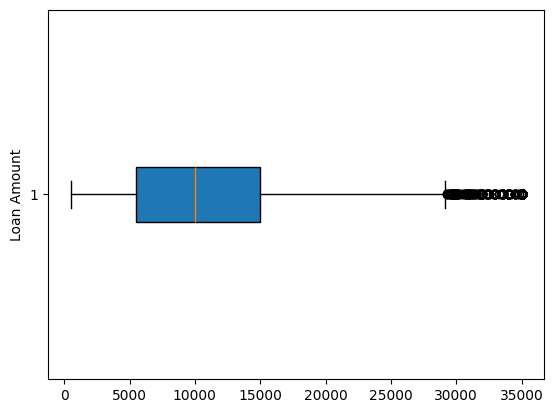

In [26]:
plt.boxplot(clean_df['loan_amnt'], vert=False, patch_artist=True)  
plt.ylabel('Loan Amount')
#plt.yticks((1),['Loan Amount'])
#patch_artist=True - fills the color
plt.show()

# 5. Multivariate Analysis - Correlation between loan_amnt, installment, annual_inc,funded_amnt and funded_amnt_inv

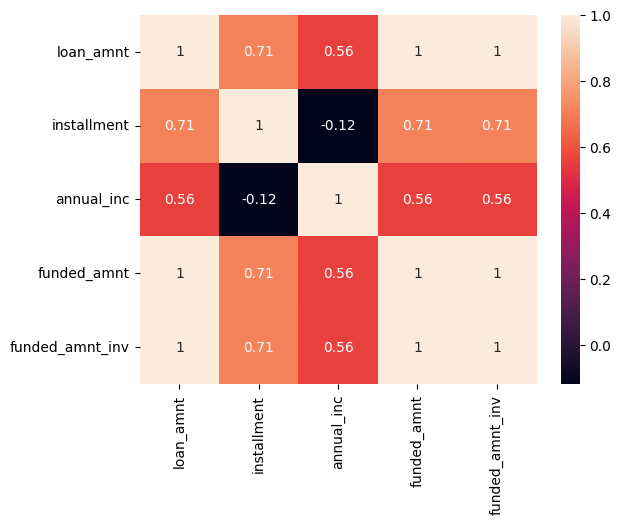

In [27]:
sns.heatmap(clean_df.loc[:,['loan_amnt','installment','annual_inc','funded_amnt','funded_amnt_inv']].describe().corr(),annot=True)
plt.show()

# 6. Bivariate Analysis - Loan_status Vs Loan_amnt

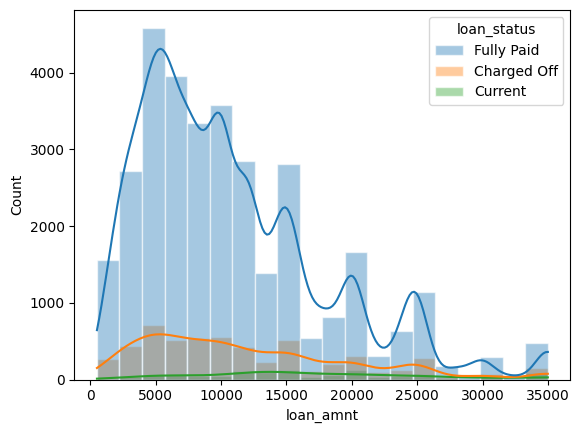

In [28]:
sns.histplot(clean_df,x='loan_amnt',bins=20,kde=True, kde_kws=dict(cut=0),
    alpha=.4, edgecolor=(1, 1, 1, .6),hue='loan_status')
plt.show()

# 7. Bivariate Analysis - Loan_status VS Address

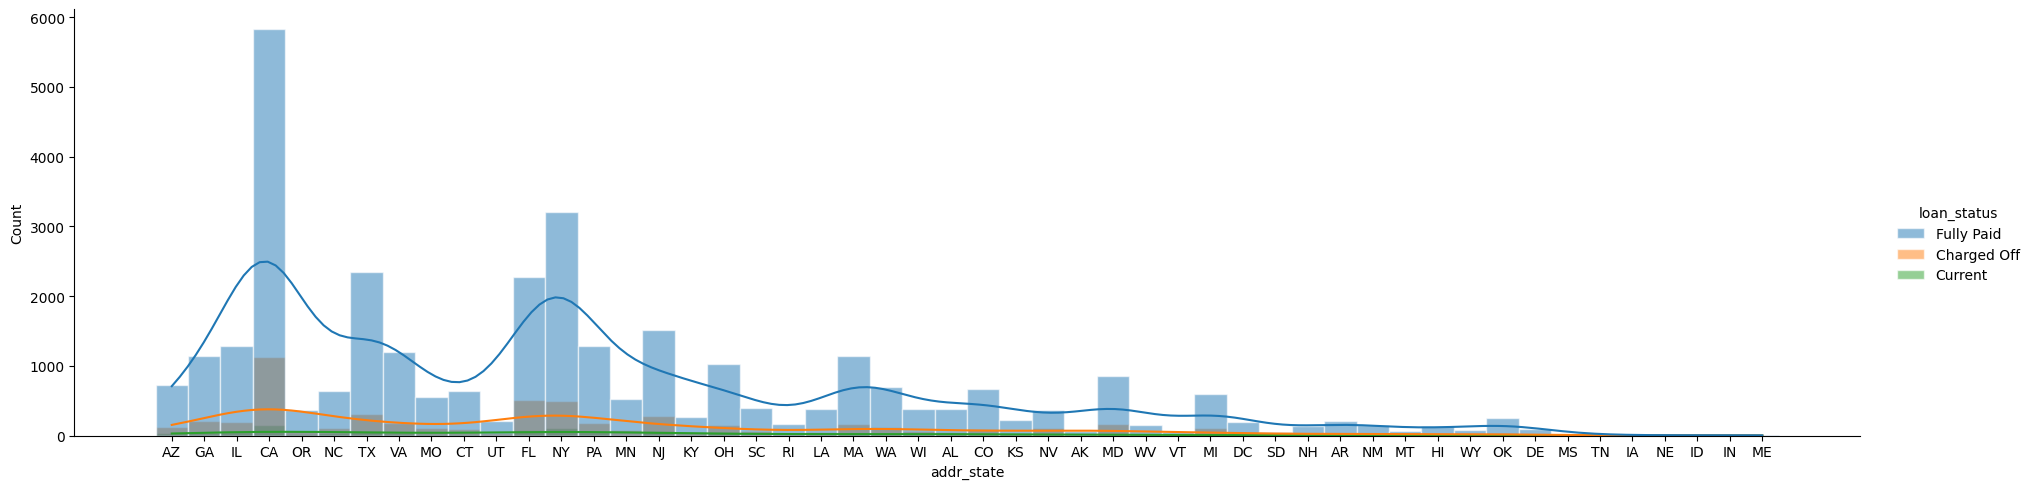

In [29]:
sns.displot(clean_df,x='addr_state',bins=40,kde=True, kde_kws=dict(cut=0),
    alpha=.5, edgecolor=(1, 1, 1, .6),color='orange',hue='loan_status' ,height=5, aspect=3.8)
plt.show()

# 8. Bivariate Analysis - Loan_status Vs Home ownership 

In [30]:
loan_status = [clean_df[clean_df['home_ownership']=='RENT']['loan_status'].value_counts().to_dict(),
              clean_df[clean_df['home_ownership']=='MORTGAGE']['loan_status'].value_counts().to_dict(),
               clean_df[clean_df['home_ownership']=='OWN']['loan_status'].value_counts().to_dict(),
               clean_df[clean_df['home_ownership']=='OTHER']['loan_status'].value_counts().to_dict(),
               clean_df[clean_df['home_ownership']=='NONE']['loan_status'].value_counts().to_dict()
              ]
stat = {
        'Fully Paid': [],
        'Charged Off': [],
        'Current': []
}
for i in loan_status:
    #print(i)
    #if len(i.items())
    if 'Fully Paid' not in i.keys():
        i['Fully Paid'] = 0
    if 'Charged Off' not in i.keys():
        i['Charged Off'] = 0
    if 'Current' not in i.keys():
        i['Current'] = 0
    stat['Fully Paid'].append(i['Fully Paid'])
    stat['Charged Off'].append(i['Charged Off'])
    stat['Current'].append(i['Current'])   
stat

{'Fully Paid': [15641, 14694, 2532, 80, 3],
 'Charged Off': [2839, 2327, 443, 18, 0],
 'Current': [419, 638, 83, 0, 0]}

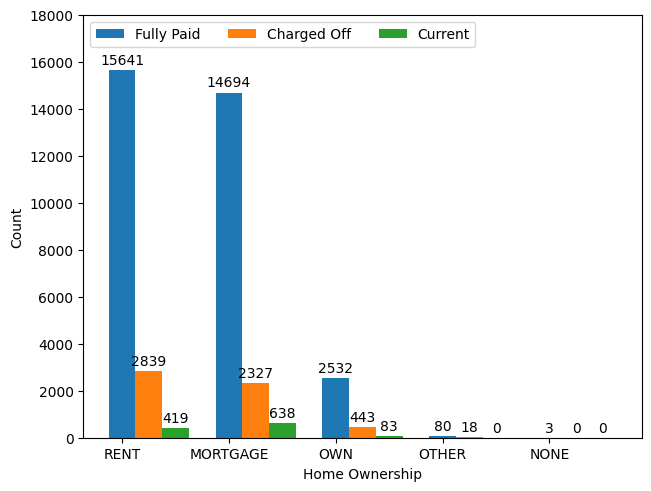

In [31]:
home_ownership = ("RENT","MORTGAGE","OWN","OTHER","NONE")
loan_status = stat
x = np.arange(len(home_ownership))  # the label locations
width = 0.25  # the width of the bars
multiplier = 1
fig, ax = plt.subplots(layout='constrained')
for status, status_count in loan_status.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, status_count, width, label=status)
        ax.bar_label(rects, padding=2)
        multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Home Ownership')
ax.set_xticks(x + width, home_ownership)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 18000)
plt.show()

# 9. Bivariate Analysis - Stacked bar chart Analysis for Grades

In [32]:
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

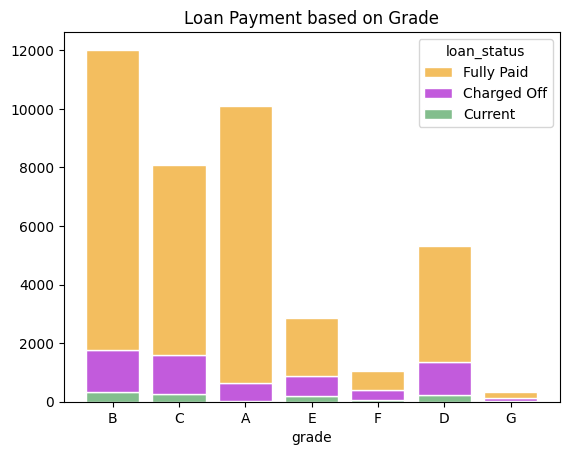

In [33]:
ax = sns.histplot(
    clean_df,
    x='grade',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='sub_grade',
    hue='loan_status',
    multiple='stack',
    palette=['#efa929', '#ae24d1','#59a967'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Loan Payment based on Grade')
# Remove 'Count' ylabel.
ax.set_ylabel(None)
plt.show()

# 10. Univariate Analysis - Pie chart to check Verification Status

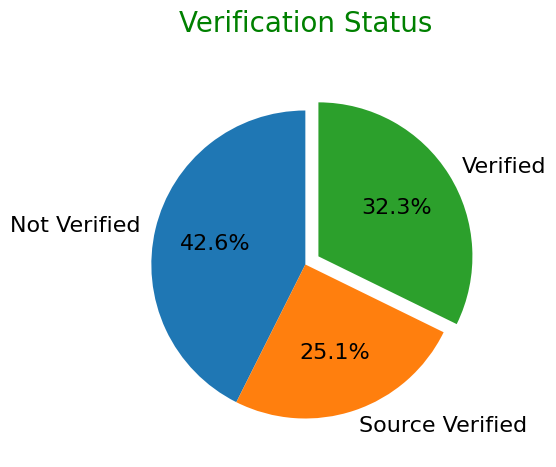

In [34]:
group_data = clean_df.groupby('verification_status').count()

# Create lists which hold the necessary data
x_vals = []
y_vals = []
for i in range(len(group_data)): 
    # The elements in the list are arranged in increasing order of the quality of cut. 
    # This information can be gathered from the data dictionary.  
    x_vals.append(group_data.index[i])
    y_vals.append(group_data.iloc[i,0])
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [5,5])

plt.pie(y_vals, explode=explode, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Verification Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

# 11. Bivariate Analysis - Stacked bar chart for Grade and subgrade count of customers applied for loan

In [36]:
grade_group_data = clean_df.groupby('grade')

/var/folders/n3/cbql2_sd28n7ws76wtd_mphw0000gn/T/ipykernel_50793/4111319282.py:3: UserWarning: 
The palette list has fewer values (5) than needed (35) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(


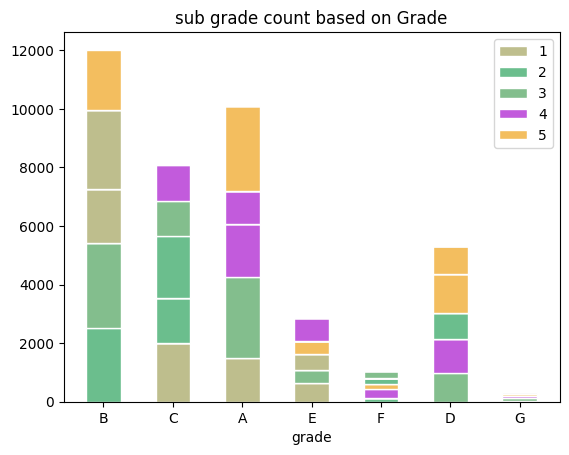

In [38]:
grade_group_data['sub_grade'].count()
#sub_grade.value_counts()
ax = sns.histplot(
    clean_df,
    x='grade',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='sub_grade',
    hue='sub_grade',
    multiple='stack',
    palette=['#efa929', '#ae24d1','#59a967','#39a967','#a9a967'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.5
)
plt.legend(['1','2','3','4','5'])
ax.set_title('sub grade count based on Grade')
# Remove 'Count' ylabel.
ax.set_ylabel(None)
plt.show()

# 12. Univariate Analysis - Maximum interest rate

In [39]:
clean_df['rate'] = clean_df['int_rate'].apply(lambda x: float(x.replace('%','')))

/var/folders/n3/cbql2_sd28n7ws76wtd_mphw0000gn/T/ipykernel_50793/3741072686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['rate'] = clean_df['int_rate'].apply(lambda x: float(x.replace('%','')))


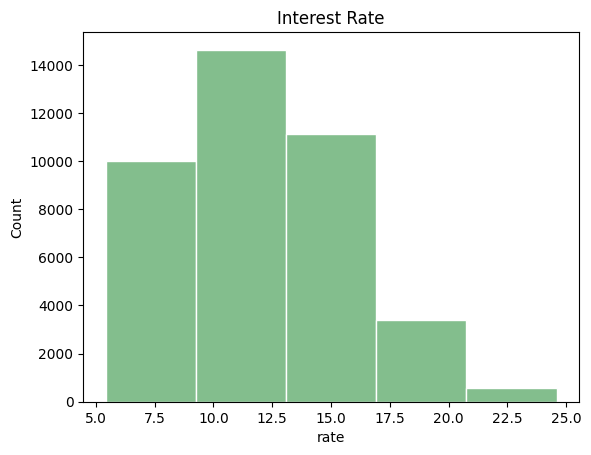

In [42]:
ax = sns.histplot(
    clean_df,
    x='rate',
    edgecolor='white',
    color = '#59a967',
    shrink=1,
    bins=5
)
ax.set_title('Interest Rate')
# Remove 'Count' ylabel.
ax.set_ylabel('Count')
rate_range = clean_df['rate'].describe().to_dict()
del rate_range['count']
del rate_range['mean']
del rate_range['std']
rate_range.values()
plt.show()